In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

/Users/harrywiner/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

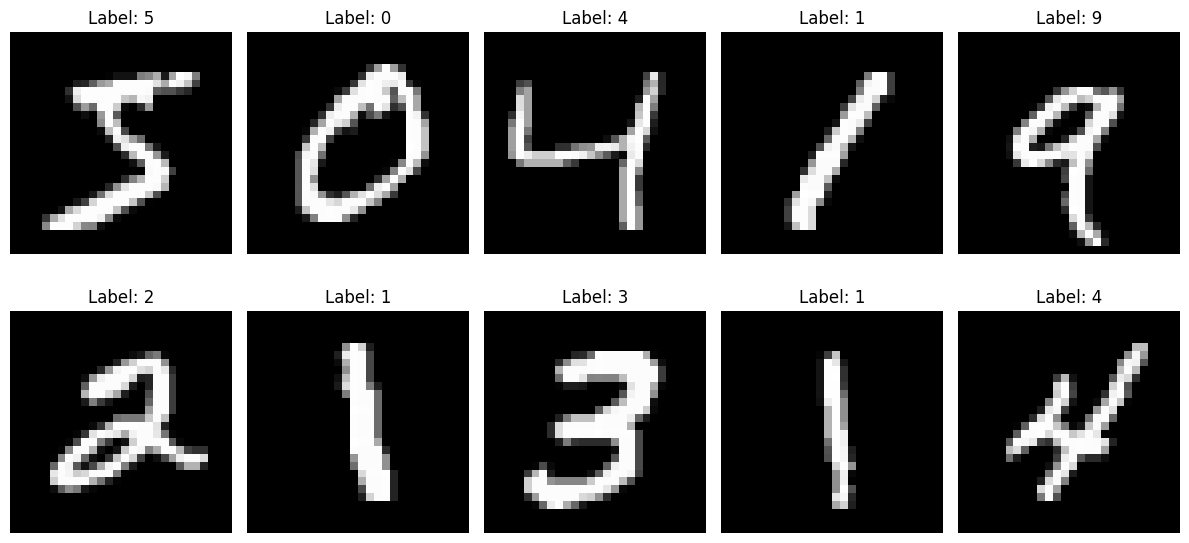

In [15]:
import matplotlib.pyplot as plt

# Create a figure with 10 subplots
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

# Iterate over the first 10 images in x_train
for i in range(10):
    # Get the image and its label
    image = x_train[i]
    label = y_train[i]
    
    # Plot the image in the corresponding subplot
    ax = axs[i // 5, i % 5]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Stats
Calculate the mean and the std of each of the pixels

In [16]:
x_train.shape

(60000, 28, 28)

In [51]:
def calculate_samples_mean_std(samples, title="of samples"):
    transform = samples.reshape(28, samples.shape[0], 28)
    means = transform.mean(axis=1)
    stds = transform.std(axis=1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # means
    im1 = ax1.imshow(means)
    ax1.set_title(f"Mean {title}")
    fig.colorbar(im1, ax=ax1)

    # stds
    im2 = ax2.imshow(stds, cmap='plasma')
    ax2.set_title(f"std {title}")
    fig.colorbar(im2, ax=ax2)

    plt.show()
    pass

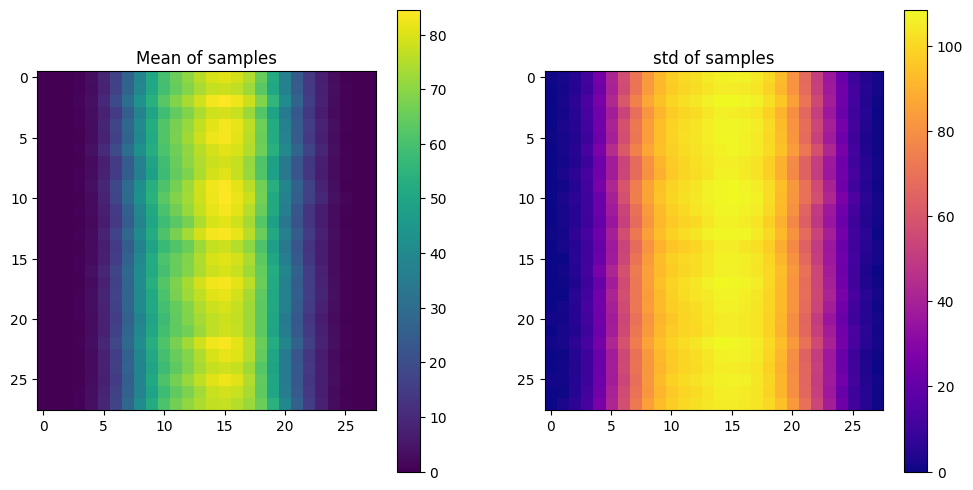

In [52]:
calculate_samples_mean_std(x_train)

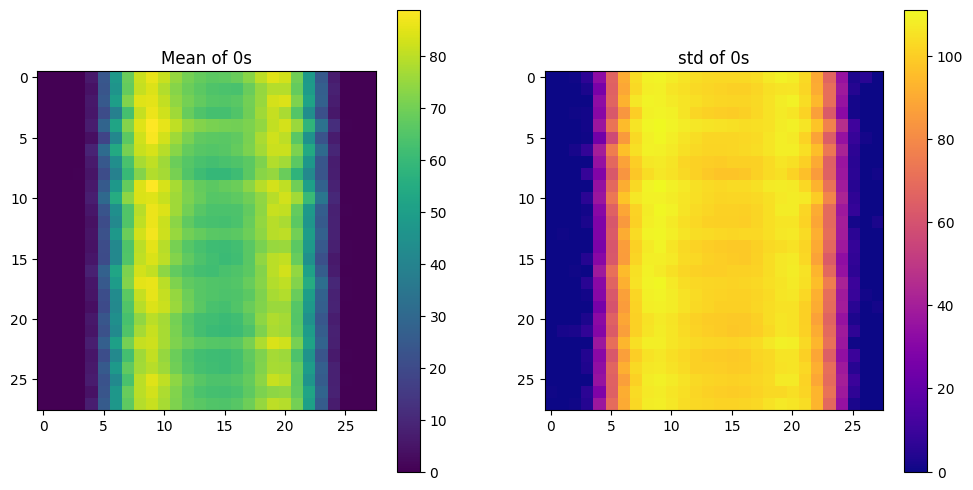

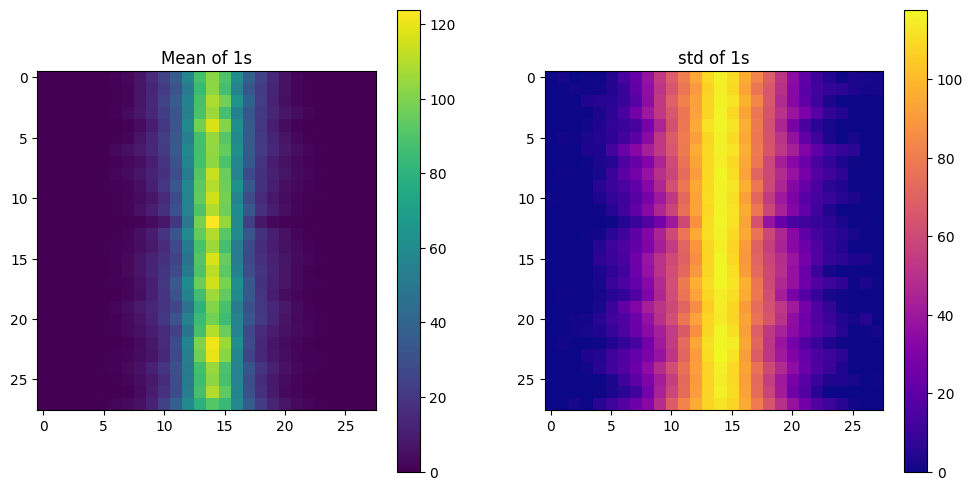

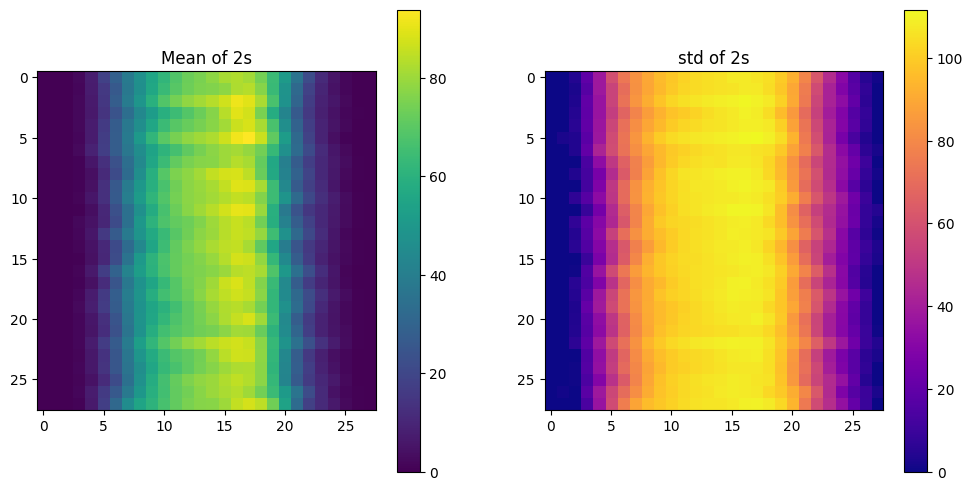

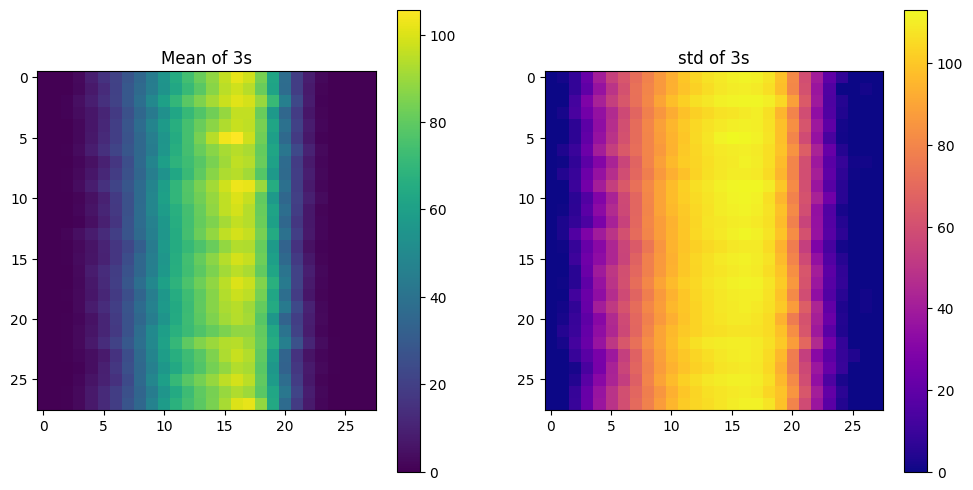

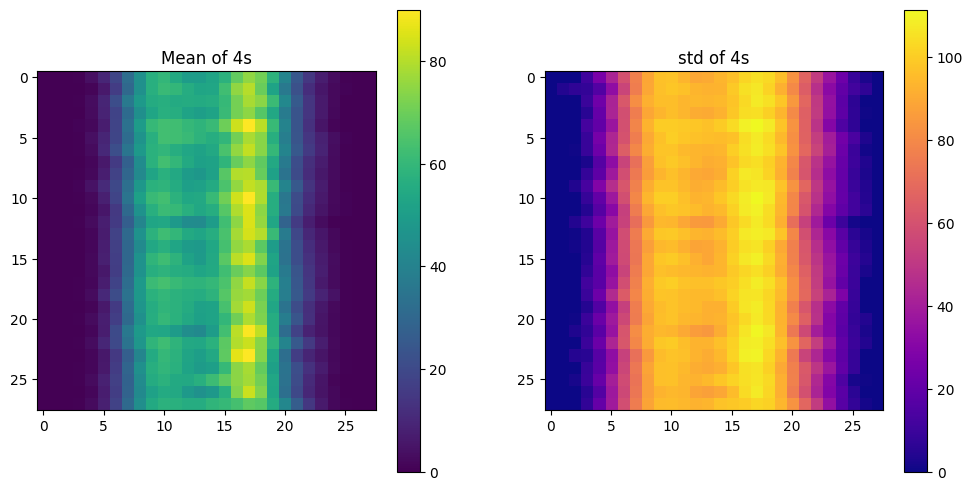

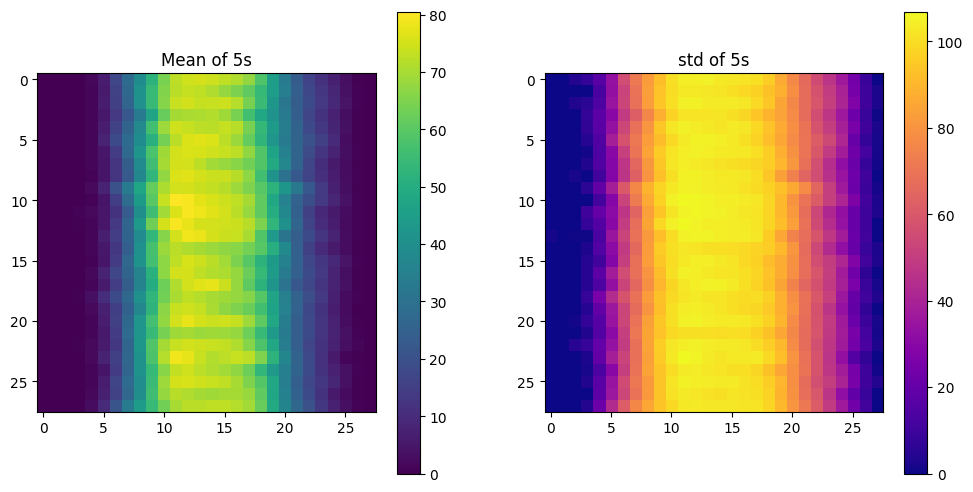

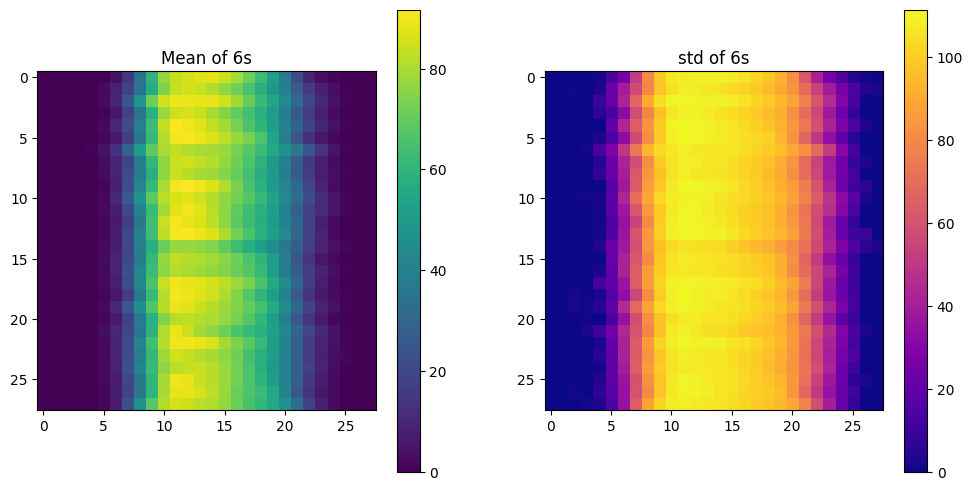

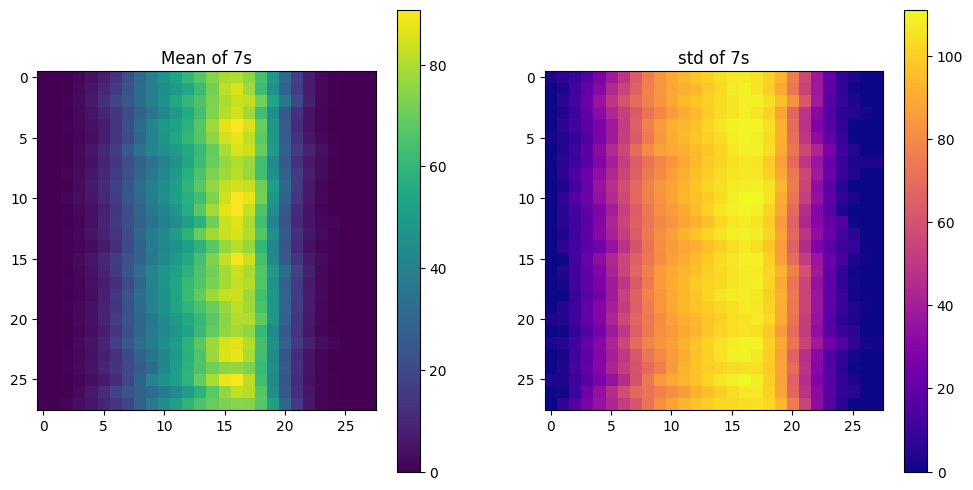

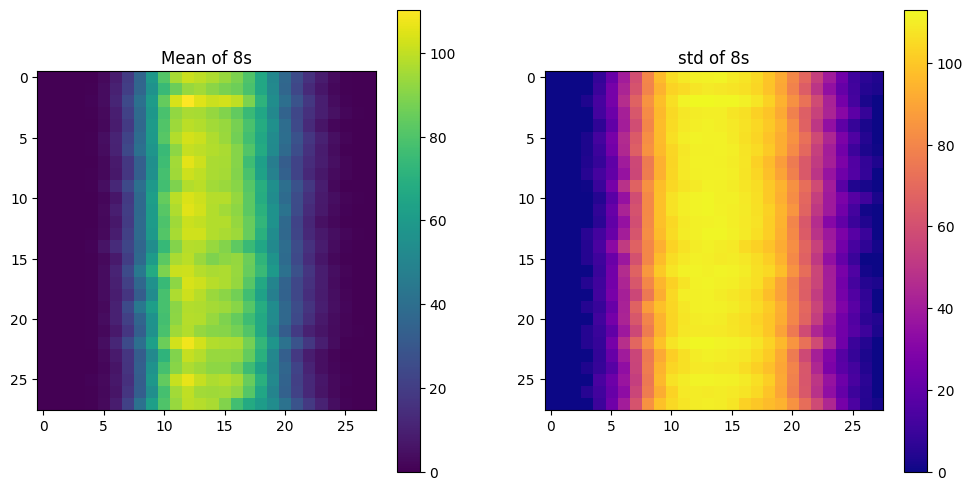

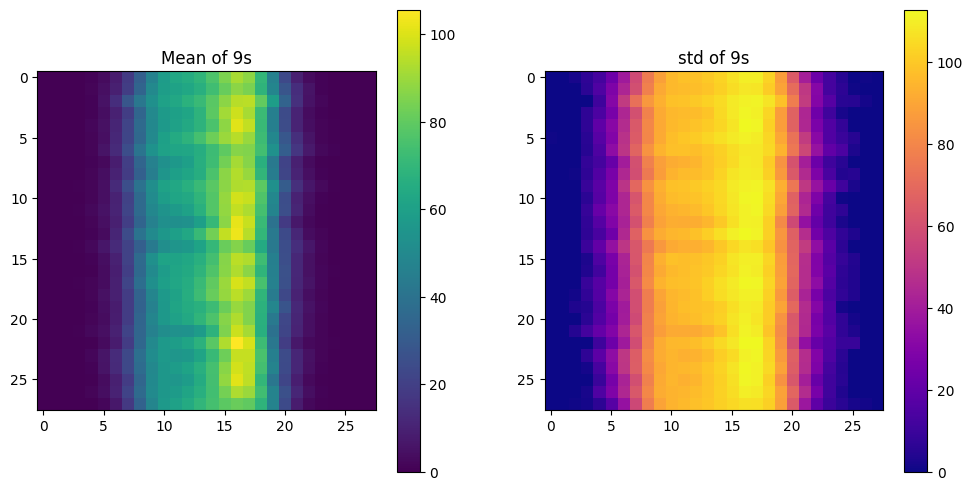

In [59]:
for i in range(10): 
    filtered_x_train = x_train[y_train == i]
    calculate_samples_mean_std(filtered_x_train, f"of {i}s")

In [ ]:
from sklearn.decomposition import PCA

In [66]:
def apply_pca(x_train, y_train, show=True):
    # Perform PCA on x_train
    pca = PCA(n_components=2)
    x_train_pca = pca.fit_transform(x_train)

    # Get unique labels in y_train
    labels = np.unique(y_train)

    # Create a separate plot for each label
    if show:
        for label in labels:
            # Filter the data for the current label
            filtered_x_train = x_train_pca[y_train == label]

            # Plot the transformed data
            plt.figure(figsize=(8, 6))
            plt.scatter(filtered_x_train[:, 0], filtered_x_train[:, 1])
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.title(f'PCA Visualization for Label {label}')
            plt.show()
    return x_train_pca

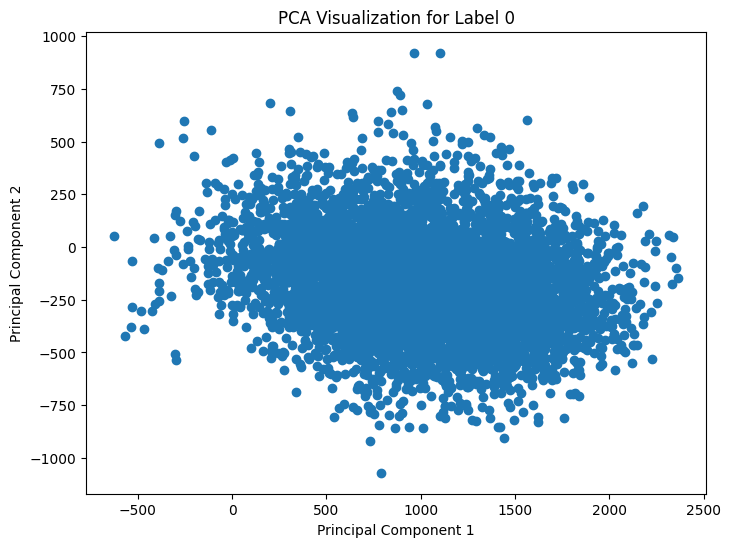

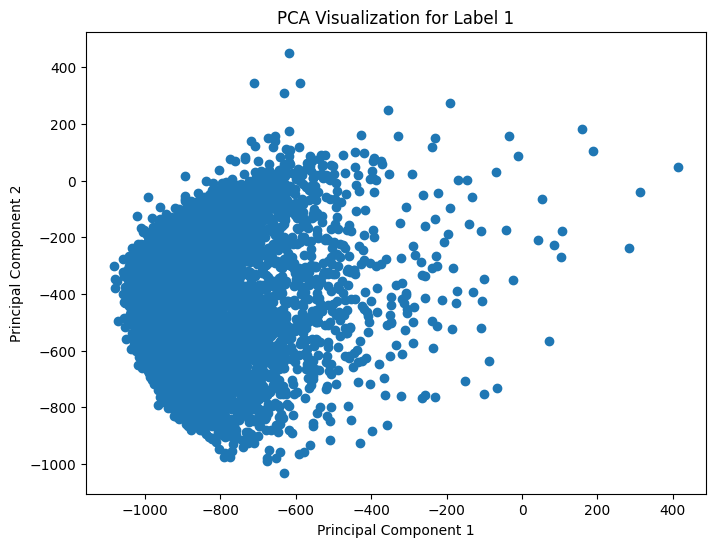

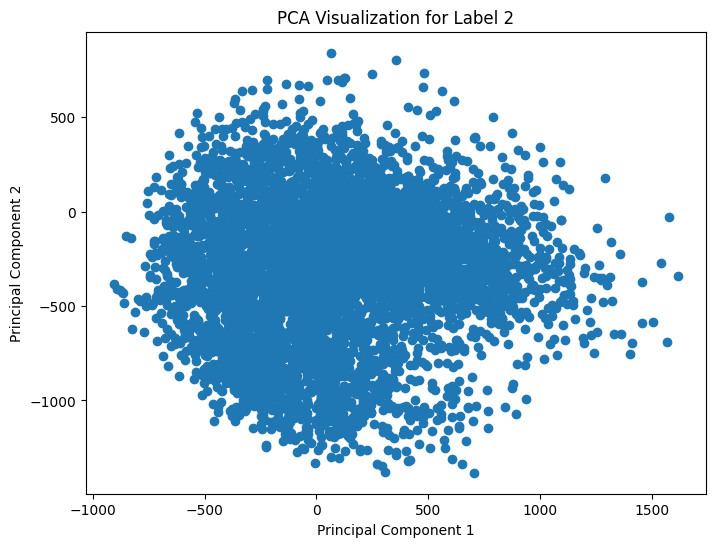

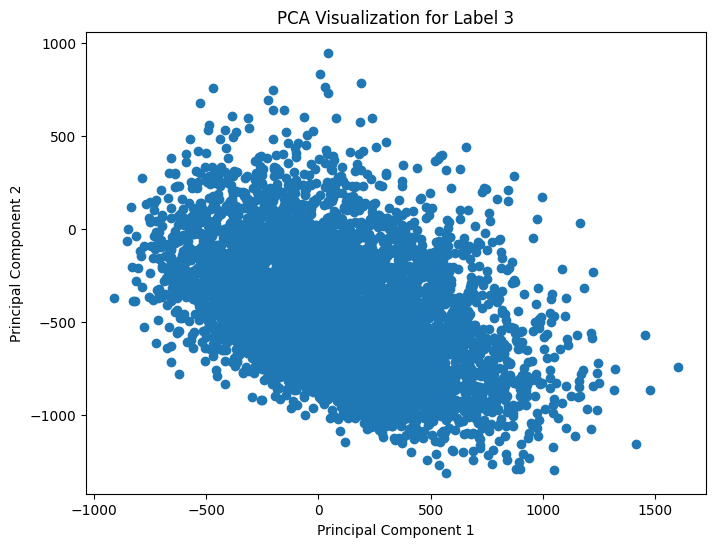

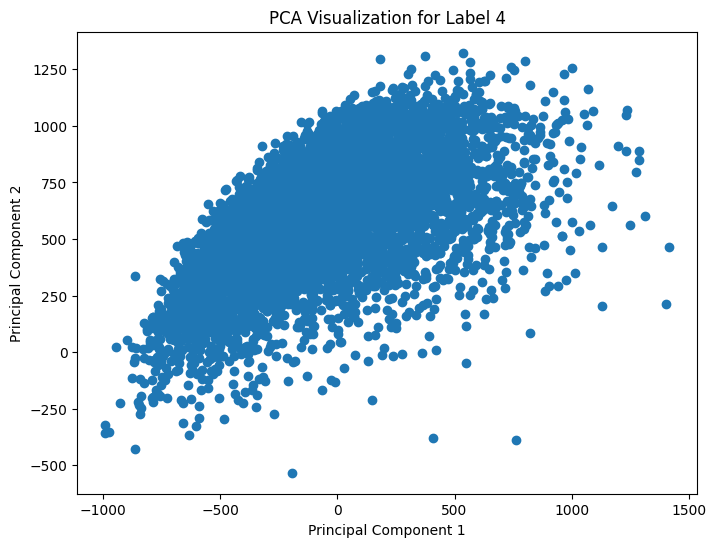

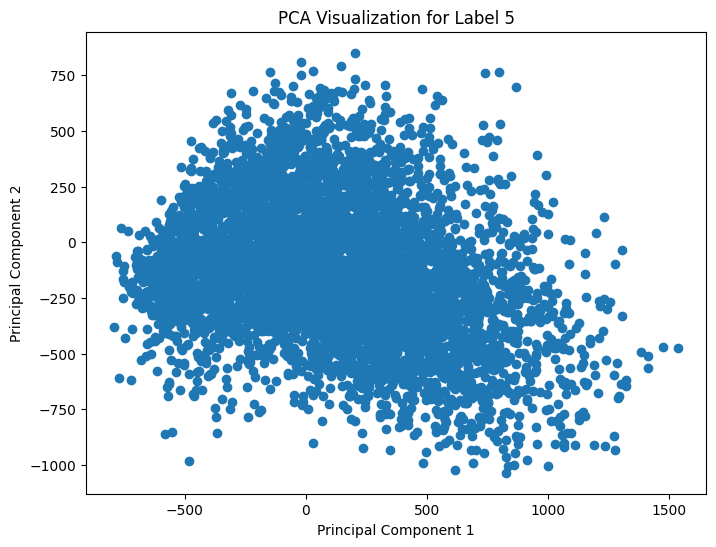

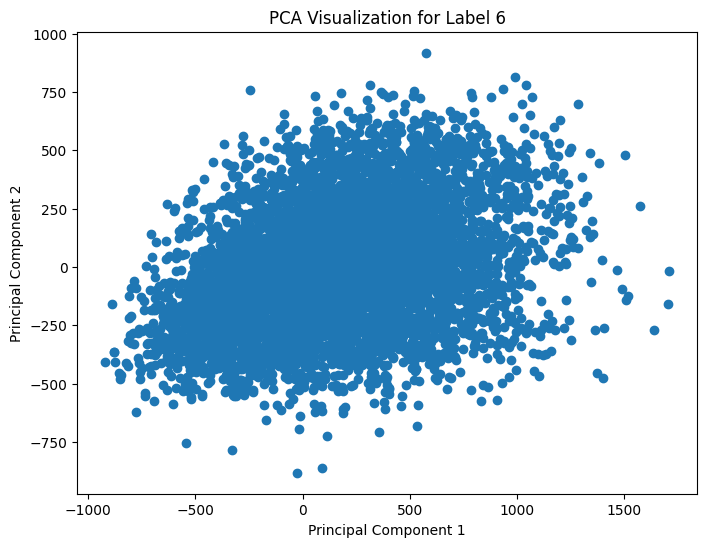

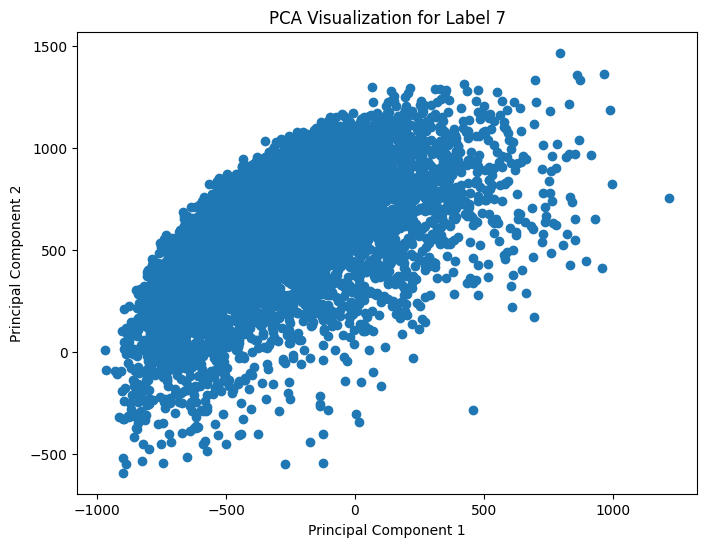

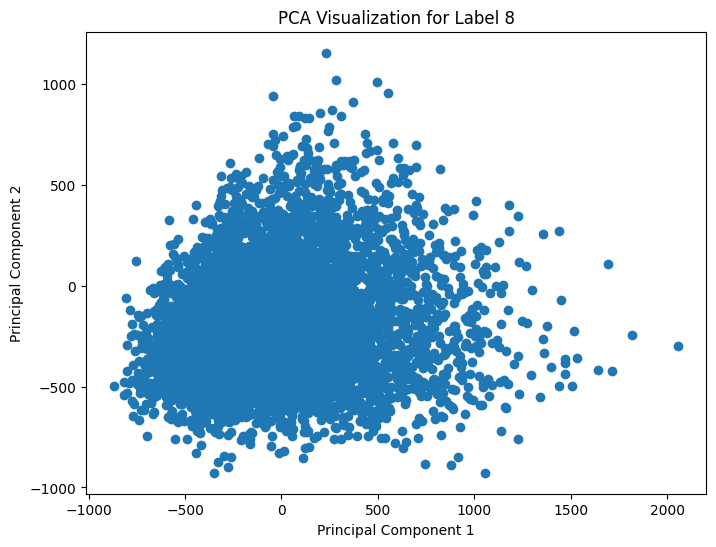

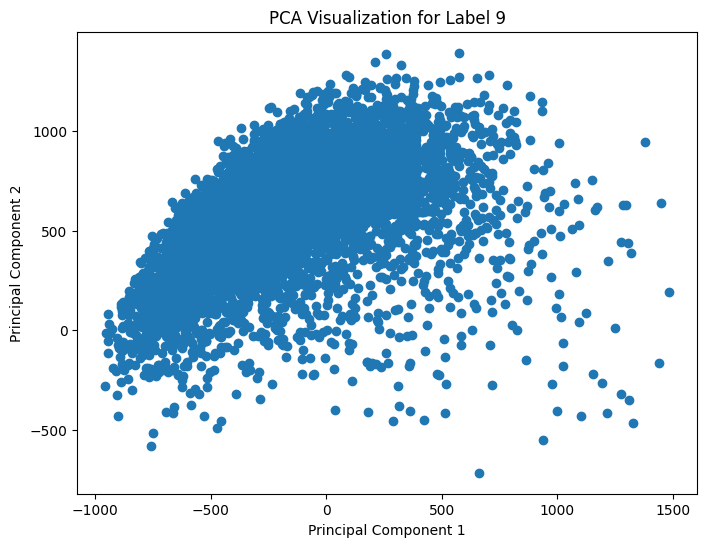

In [67]:
apply_pca(x_train.reshape(x_train.shape[0], -1), y_train)

In [65]:
import torch

# Check if GPUs are available
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")
else:
    print("No GPUs available")


No GPUs available
